### <font color='blue'>*Комментарий наставника*</font>
Привет, меня зовут Аня Прокашева и я проверяю твою работу.<br>
Далее в работе я буду оставлять свои комментарии в ячейках с заголовком "Комментарий наставника". <br>
Комментарии будут разделены на 3 типа:

<div style="background-color:lightgreen">

### *Комментарий наставника*
Все отлично, замечаний нет.
</div>


<div style="background-color:yellow">

### *Комментарий наставника*
Есть комментарий к твоей работе, но он носит рекомендательный характер.
</div>


<div style="background-color:red">

### *Комментарий наставника*
Есть замечание к работе, которое влияет на корректность выполнения. Данный пункт обязательно нужно исправить
</div>

# Описание проекта

## Задача



Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.
<br>
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что пользователь больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
<br>
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
<br>
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
<br>
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    * 1) выделить целевые группы клиентов;
    * 2) предложить меры по снижению оттока;
    * 3) определить другие особенности взаимодействия с клиентами.

### Шаг 1. Загрузите данные

Загружаем необходимые для работы библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings("ignore")

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:<br>
* 'Churn' — факт оттока в текущем месяце;
* Текущие поля в датасете:
    * Данные пользователя за предыдущий до проверки факта оттока месяц:
        * 'gender' — пол
        * 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
        * 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
        * Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
        * 'Phone' — наличие контактного телефона
        * 'Age' — возраст
        * 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)
    * Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента
        * 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
        * 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
        * 'Group_visits' — факт посещения групповых занятий
        * 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
        * 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
        * 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон
    

In [3]:
df=pd.read_csv('/datasets/gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Шаг 2. Проведите исследовательский анализ данных (EDA)

* Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
* Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался;
* Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
* Постройте матрицу корреляций и отобразите её.

    Теперь проверим, являются ли какие-либо функции нулевыми и категоричными или нет. Это связано с тем, что нулевые значения привели бы к тому, что модели машинного обучения со смещением требуют числовых значений, а не категориальных.

In [4]:
df.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

    Нулевые значения не найдены, поэтому объекты остаются без изменений. Теперь давайте проверим, есть ли какие-либо категориальные значения.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


    Мы видим, что все функции являются числовыми. Теперь изучим средние значения и стандартные отклонения, при помощи метода describe()

In [6]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


    Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [7]:
df.groupby([df.Churn == 1]).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Churn,,,,,,,,,,,,,,
False,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
True,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0


Взглянем на общее количество посетителей, чей 'Churn' — факт оттока в текущем месяце равен единице

In [8]:
df.groupby([df.Churn == 1]).count()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Churn,,,,,,,,,,,,,,
False,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939
True,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061


In [9]:
no_churn = df.loc[df.Churn == 0 ]
no_churn.mean()

gender                                 0.510037
Near_Location                          0.873086
Partner                                0.534195
Promo_friends                          0.353522
Phone                                  0.903709
Contract_period                        5.747193
Group_visits                           0.464103
Age                                   29.976523
Avg_additional_charges_total         158.445715
Month_to_end_contract                  5.283089
Lifetime                               4.711807
Avg_class_frequency_total              2.024876
Avg_class_frequency_current_month      2.027882
Churn                                  0.000000
dtype: float64

In [10]:
churn = df.loc[df.Churn == 1]
churn.mean()

gender                                 0.510839
Near_Location                          0.768143
Partner                                0.355325
Promo_friends                          0.183789
Phone                                  0.902922
Contract_period                        1.728558
Group_visits                           0.268615
Age                                   26.989632
Avg_additional_charges_total         115.082899
Month_to_end_contract                  1.662582
Lifetime                               0.990575
Avg_class_frequency_total              1.474995
Avg_class_frequency_current_month      1.044546
Churn                                  1.000000
dtype: float64

    Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

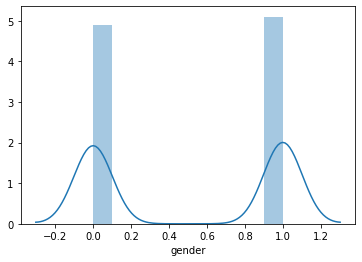

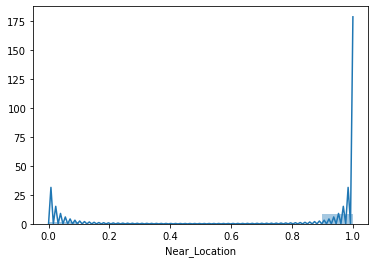

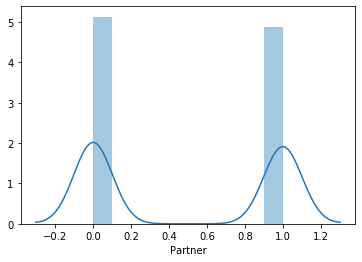

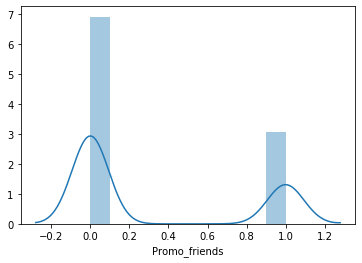

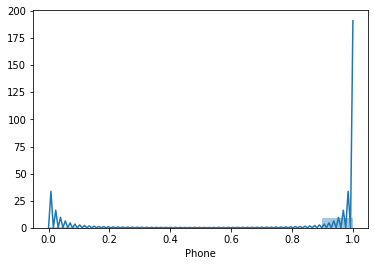

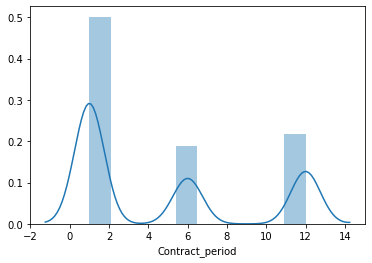

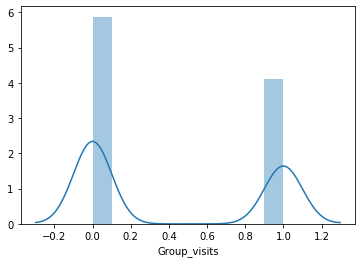

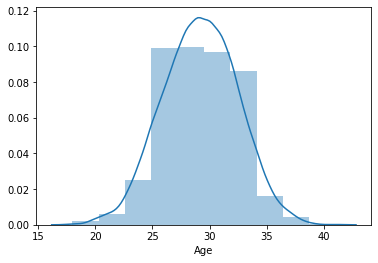

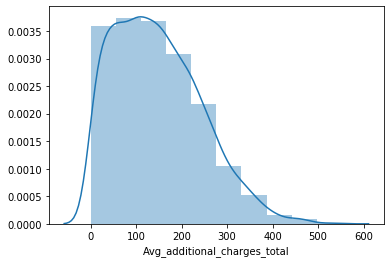

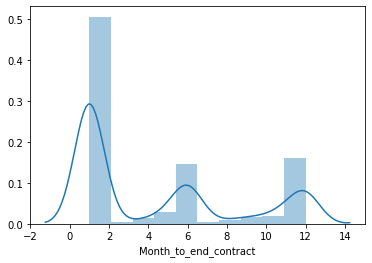

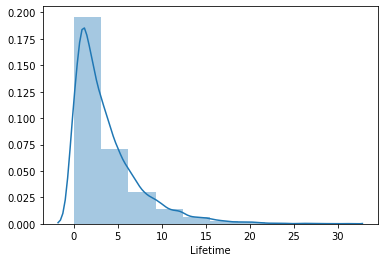

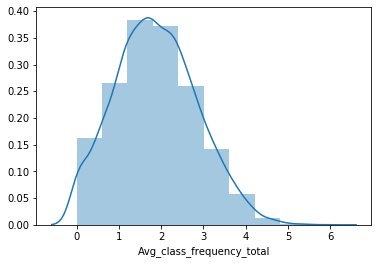

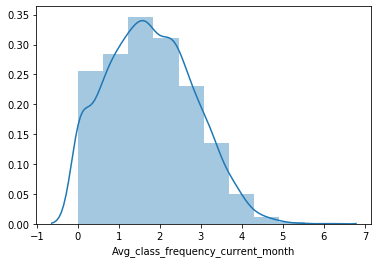

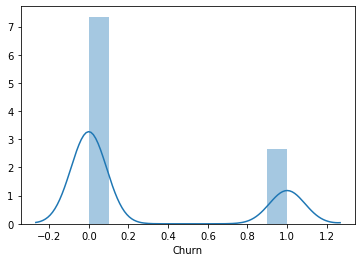

In [11]:
for feature in churn.columns:
  sns.distplot(df[feature], bins = 10)
  plt.show()

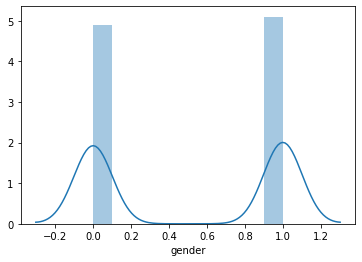

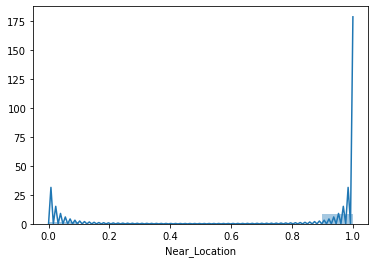

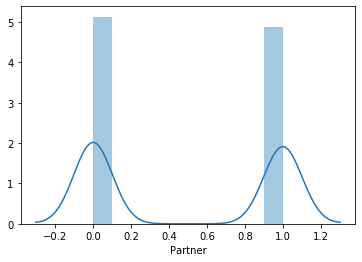

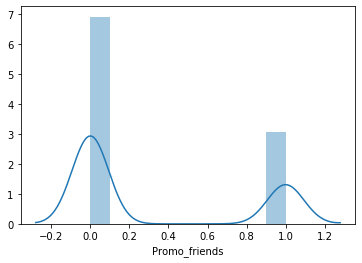

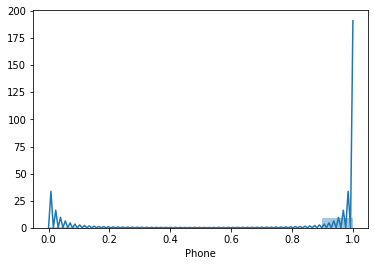

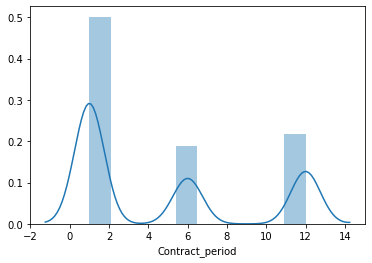

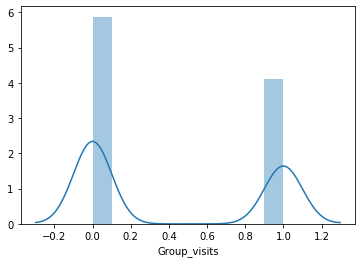

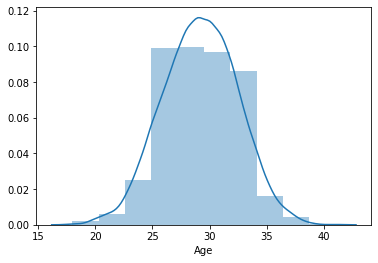

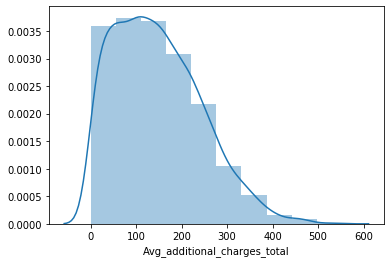

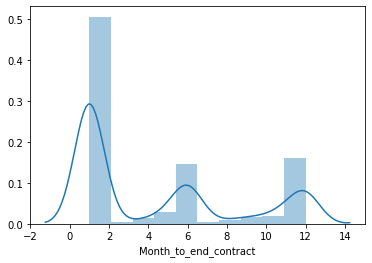

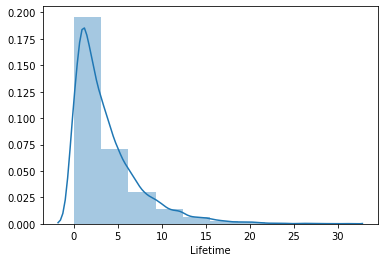

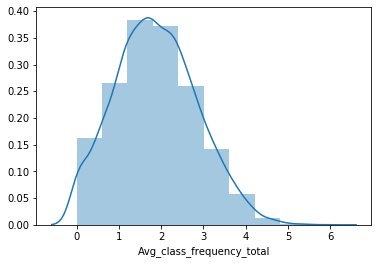

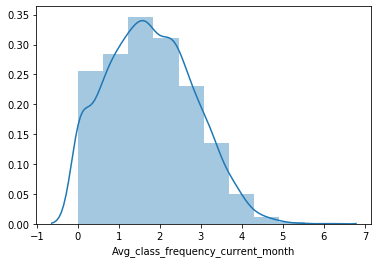

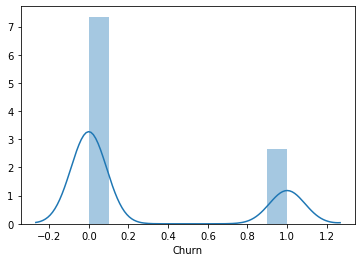

In [12]:
for feature in no_churn.columns:
  sns.distplot(df[feature], bins = 10)
  plt.show()

Построим матрицу корреляций и отобразите её.

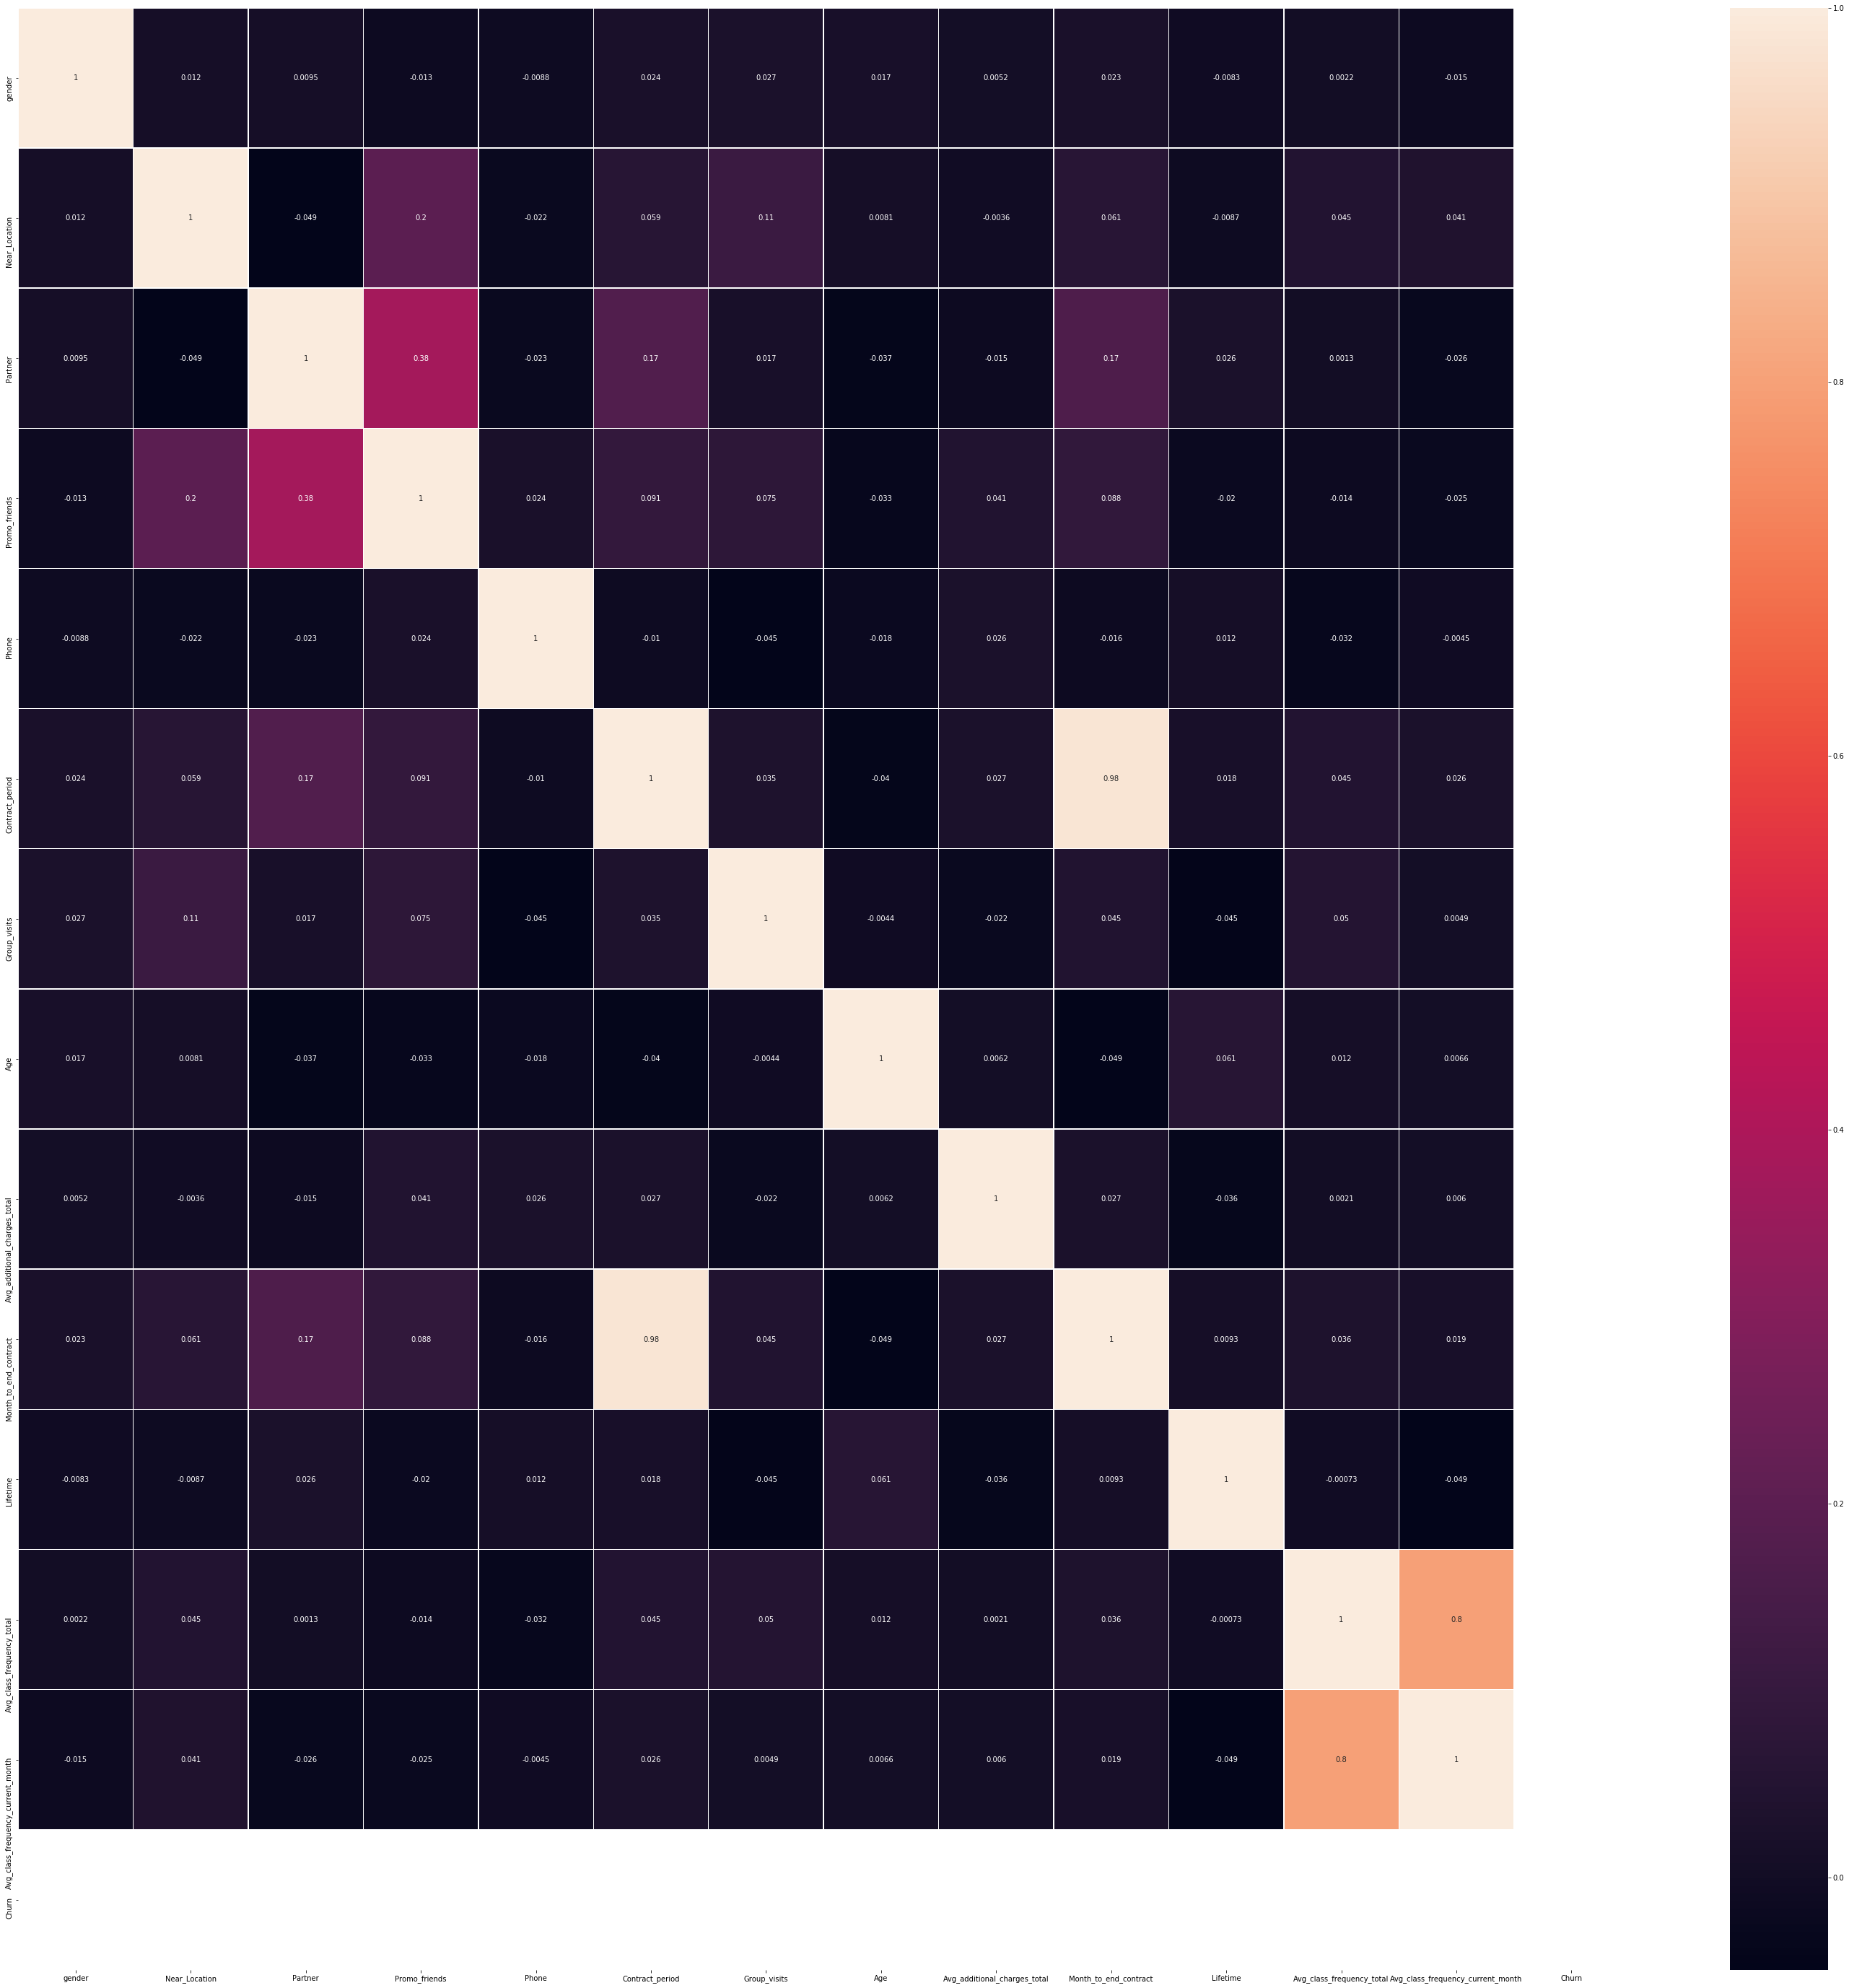

In [13]:
corr_churn = churn.corr()
fig, ax = plt.subplots(figsize=(50,50))         # Sample figsize in inches
sns.heatmap(corr_churn, annot=True, linewidths=.5, ax=ax)

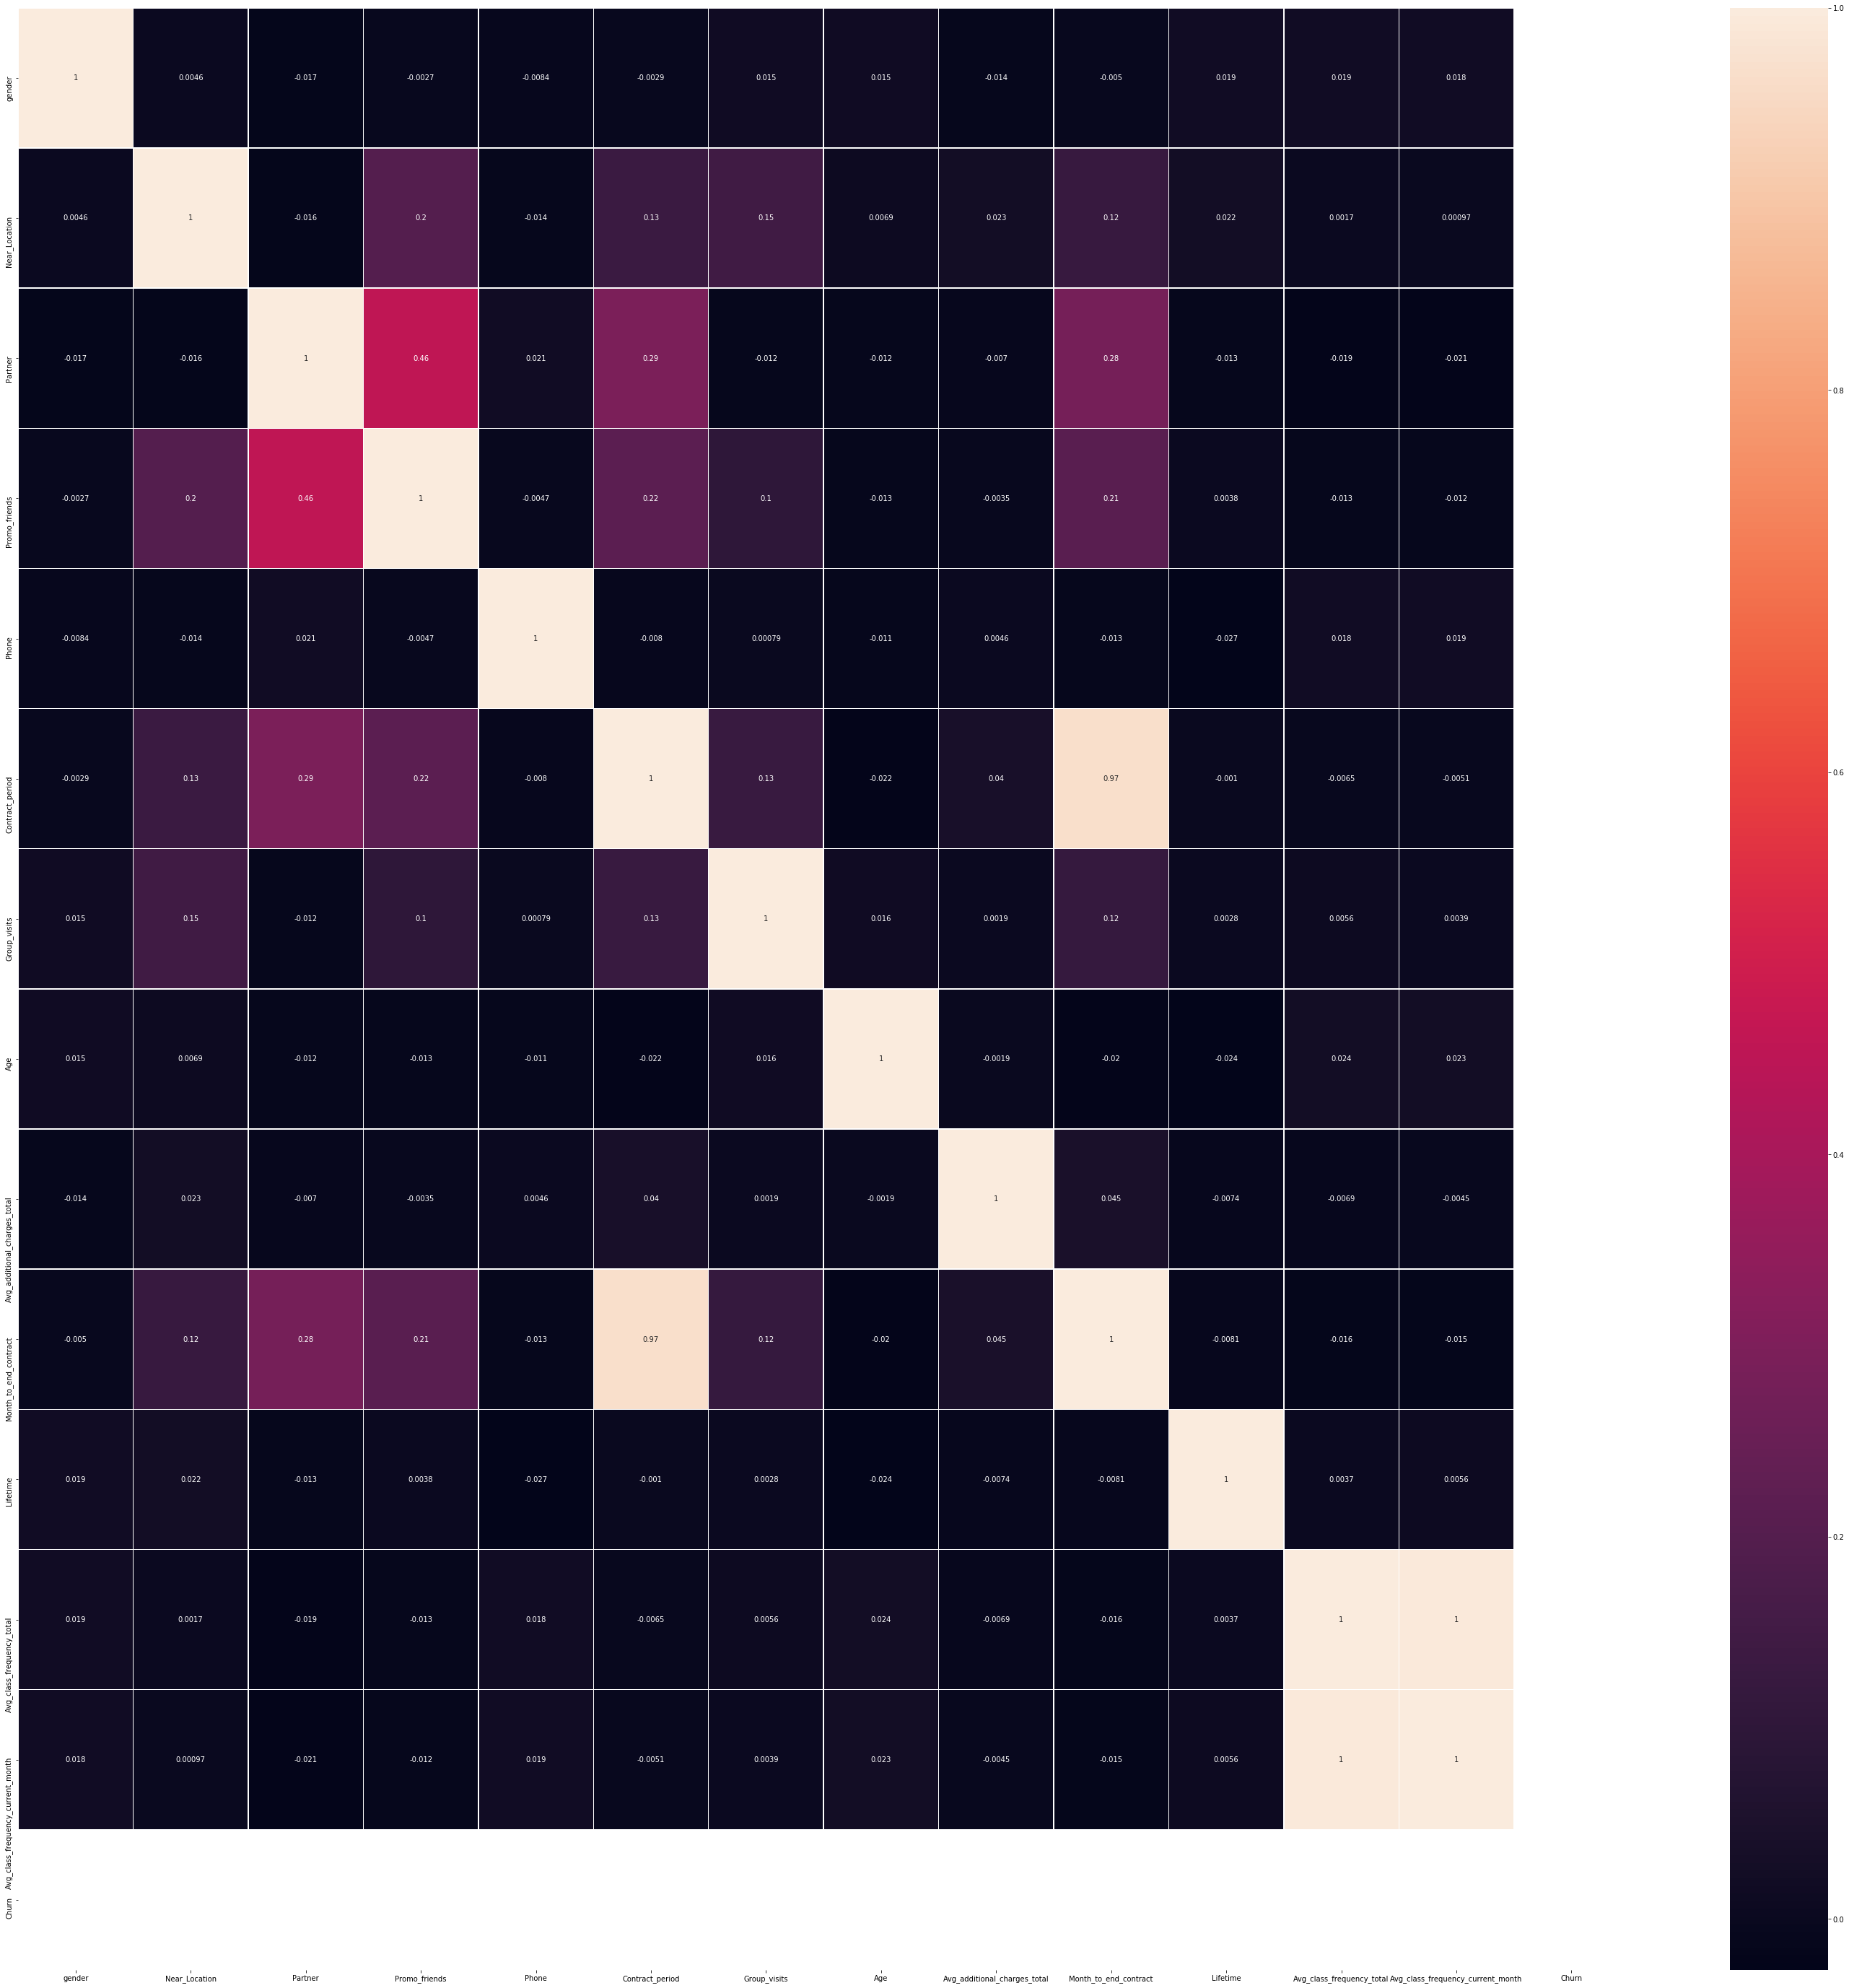

In [14]:
corr_no_churn = no_churn.corr()
fig, ax = plt.subplots(figsize=(50,50))         # Sample figsize in inches
sns.heatmap(corr_no_churn, annot=True, linewidths=.5, ax=ax)


На этапе "исследовательский анализ данных (EDA)" была проделана следующая работа:
* Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
* Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался;
* Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
* Постройте матрицу корреляций и отобразите её.

ВЫВОД:<br>
* В датасете отсутствуют пустые и нулевые значения.


| Признаки  | Отток | Отставшиеся |
|:------------- |:---------------:| :-------------:|
| длительность абонемента     | 1,7 мес. |     5,7 мес. |
|сотрудник компании-партнёра клуба|0.53 | 0.35|
| факт посещения групповых занятий| 0.46 |0.26|
| средний возраст     | 29       |     26   |
| срок окончания абонемента | 1,6 мес.      |        5,2 мес. |
|средняя частота посещений в неделю|1 раз|2 раза|


Из полученных данных можно выдвинуть гипотезу, что чем дольше(от 5 месяцев) и чаще(более 2 раз в неделю) занимается клиент и чаще ходит на групповые занятия тем меньше шанс, что он уйдет

In [15]:
df.groupby([df.Churn == 1]).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Churn,,,,,,,,,,,,,,
False,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
True,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0


<div style="background-color:lightgreen">

### *Комментарий наставника*
Данные предобработаны корректно.
</div>

### Шаг 3. Постройте модель прогнозирования оттока пользователей

    Постройте модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:
* Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
* Обучите модель на train-выборке любым двумя способами:
    * логистической регрессией
    * случайным лесом
* Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. 

Какая модель показала себя лучше на основании метрик?

    Сначала нам нужно разделить функцию и целевую переменную. Затем разделите набор данных на набор для обучения и тестирования. И, наконец, создать модель.

Определим функцию, которая будет выводить наши метрики

In [16]:
def print_all_metrics(y_true, y_pred, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

разделяем данные на признаки (матрица X) и целевую переменную (y)

In [17]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

Разделяем модель на обучающую и валидационную выборку

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Зададим алгоритм для нашей модели

In [19]:
model = LogisticRegression()

Обучим модель

In [20]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Бинарный прогноз

In [21]:
lr_predictions = model.predict(X_test)

Обучим StandartScaler на обучающей выборке

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Преобразуйем обучающий и валидационные наборы данных

In [23]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Зададим алгоритм для новой модели на основе алгоритма случайного леса

In [24]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

Обучим модель случайного леса

In [25]:
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Воспользуемся уже обученной моделью, чтобы сделать прогнозы

In [26]:
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

Выведем все метрики

In [27]:
print_all_metrics(y_test, lr_predictions, title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83


In [28]:
print_all_metrics(y_test,rf_predictions, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


ВЫВОД:<br>
Построив модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце и обучив модель на train-выборке следующими способами:
* логистической регрессией
* случайным лесом

Проведя оценку метрик accuracy, precision и recall для обеих моделей на валидационной выборке.

Можно сделать вывод, что модель **логистической регрессии** показала себя лучше на основании метрик

<div style="background-color:red">

### *Комментарий наставника*
Сейчас ты рассмотрел только один набор гиперпараметров для случайного леса (n_estimators = 100, random_state = 0). Попробуй более детально проработать этот метод - перебрать несколько параметров. Возмножно после этого ты изменишь выбор модели.
</div>

In [72]:
for i in range(50,200,50):
    for y in range(1,5, 1):
        mas_estimators = [0]
        mas_depth = [0]
        rf_model = RandomForestClassifier(n_estimators = i,max_depth=y, random_state = 42)
        rf_model.fit(X_train_st, y_train)
        rf_predictions = rf_model.predict(X_test_st)
        rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
        print('n_estimators: ',i)
        print('max_depth: ',y)
        print_all_metrics(y_test,rf_predictions, title = 'Метрики для модели случайного леса:')

n_estimators:  50
max_depth:  1
Метрики для модели случайного леса:
	Accuracy: 0.75
	Precision: 0.00
	Recall: 0.00
n_estimators:  50
max_depth:  2
Метрики для модели случайного леса:
	Accuracy: 0.86
	Precision: 0.83
	Recall: 0.53
n_estimators:  50
max_depth:  3
Метрики для модели случайного леса:
	Accuracy: 0.87
	Precision: 0.80
	Recall: 0.62
n_estimators:  50
max_depth:  4
Метрики для модели случайного леса:
	Accuracy: 0.88
	Precision: 0.79
	Recall: 0.68
n_estimators:  100
max_depth:  1
Метрики для модели случайного леса:
	Accuracy: 0.75
	Precision: 0.00
	Recall: 0.00
n_estimators:  100
max_depth:  2
Метрики для модели случайного леса:
	Accuracy: 0.85
	Precision: 0.79
	Recall: 0.53
n_estimators:  100
max_depth:  3
Метрики для модели случайного леса:
	Accuracy: 0.87
	Precision: 0.78
	Recall: 0.65
n_estimators:  100
max_depth:  4
Метрики для модели случайного леса:
	Accuracy: 0.88
	Precision: 0.78
	Recall: 0.69
n_estimators:  150
max_depth:  1
Метрики для модели случайного леса:
	Accura

Попробовав более детально проработать этот метод и перебрать несколько параметров в цикле, выбор модели не изменился и по прежнему можно сделать вывод, что модель логистической регрессии показала себя лучше на основании метрик.

### Шаг 4. Сделайте кластеризацию пользователей

Проведите кластеризацию объектов (пользователей):

* Стандартизируйте данные.
* Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
* Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
* Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
* Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
* Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

Проведем обязательную стандартизацию данных перед работой с алгоритмами

In [ ]:
sc = StandardScaler()
x_sc = sc.fit_transform(df)

linked = linkage(x_sc, method = 'ward')

    В переменной linked сохранена таблица «связок» между объектами. Её можно визуализировать как дендрограмму

In [ ]:

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

    Предложенное оптимальное число кластеров 5 — пять разных цветов на графике.

In [ ]:
km = KMeans(n_clusters = 5)

Прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)

In [ ]:
labels = km.fit_predict(x_sc)

Сохраняем метки кластера в поле нашего датасета

In [ ]:
df['cluster_km'] = labels

Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

выводим статистику по средним значениям наших признаков по кластеру

In [ ]:
df.groupby(['cluster_km']).mean()

ВЫВОД: У одного из кластеров Churn равна 0,9978,можно предположить для членов данного кластера факт оттока в текущем месяце.

Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

In [ ]:
import matplotlib.pyplot as plot 
for i in df.columns[:-1]:
    df.pivot_table(index='cluster_km', values= i,aggfunc='mean').plot(kind="bar",grid=True,figsize=(15,8))
    plot.title('распределения признаков для кластеров');
    plot.ylabel(i);
    plot.xlabel('Кластеры');
    

ВЫВОД: У кластера с самым высоким фактом оттока, одни из самых низких показателей почти по всем признакам.

    Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [ ]:
churn = df.pivot_table(index='cluster_km',values='Churn', aggfunc='sum').reset_index()
churn['proc'] = churn.Churn / df.Churn.count() 
churn

ВЫВОД: Кластеры отличаются по доле оттока, присутствуют кластеры с высоким фактом оттока - 19,8% и он такой единственный, который склонен к оттоку, далее с более низким фактом оттока - 6,1%, остальные с почти нулевым фактом оттока, можно предположить что они надежны

### Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с пользователями и их удержания.

Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.

Выводим еще раз статистику по средним значениям наших признаков по кластеру, чтобы иметь информацию, что назвается перед глазами

In [ ]:
df.groupby(['cluster_km']).mean()

Выявлена группа клиентов,у которых высокая степерь факта оттока в текущем месяце, к ним нужно применить стратегию удержания, представители этой группы имеют низкие показатели по следующим признакам:
* 'Contract_period' — длительность текущего действующего абонемента в среднем до двух месяцев
* 'Lifetime' — время с момента первого обращения в фитнес-центр  в среднем до одного месяца
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента до полутора месяцев
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц 1 раз в неделю
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента 1,3 раза в неделю
* 'Age' — возраст младше 27 лет

На основании этого можно выдвинуть несколько предложений для реализации стратегии удержания:
* Активнее продвигать абонементы более двух месяцев, например на квартал и более
* Устраивать мотивационные акции для посетителей от одного месяца с момента первого обращения в финтес-центр, например, вместо акции акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента), оплата 3 месяцев по цене 2
* Вдохновлять на более частое посещение,например индивидуальным планом тренировок, для тех кто ходит один раз в неделю
* Устроить акцию в социальных сетях, с целью пропаганды здорогово образа жизни, для лиц младше 27 лет

<div style="background-color:yellow">

### *Комментарий наставника*
Спасибо за выполненную работу, в целом все хорошо. Правда при исследовании модели стоит более детально поработать с гиперпараметрами. Не забудь, что доработки могут изменить выводы, стоих их тоже изменить если потребуется. 
</div>